* Q1: Implementing a Basic Autoencoder

Task: Build and train a simple fully connected autoencoder on MNIST

Step 1: Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

Step 2: Load the MNIST dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Step 3: Normalize and reshape the data

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

Step 4: Define a function to build an autoencoder with a given latent dimension

In [4]:
def build_autoencoder(latent_dim):
    # Encoder
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)

    # Decoder
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)
    return autoencoder

Step 5: Train and evaluate autoencoder with different latent sizes
Step 6: Predict on test data
Step 7: Plot original vs reconstructed images


Training autoencoder with latent dimension = 16
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


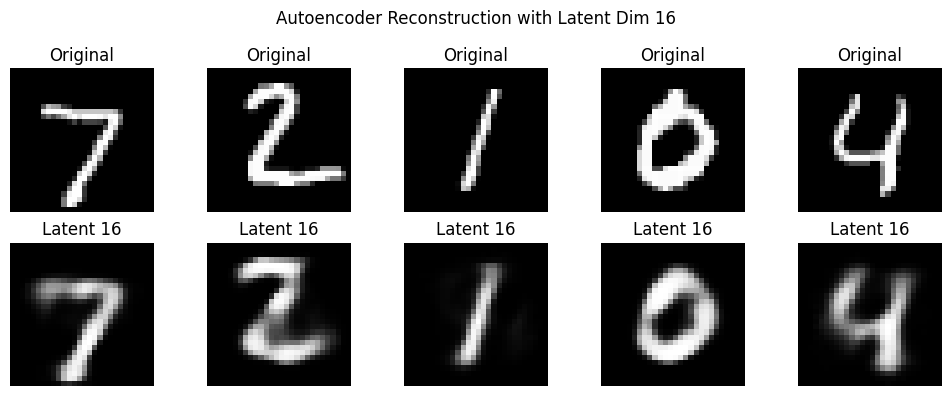


Training autoencoder with latent dimension = 32
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


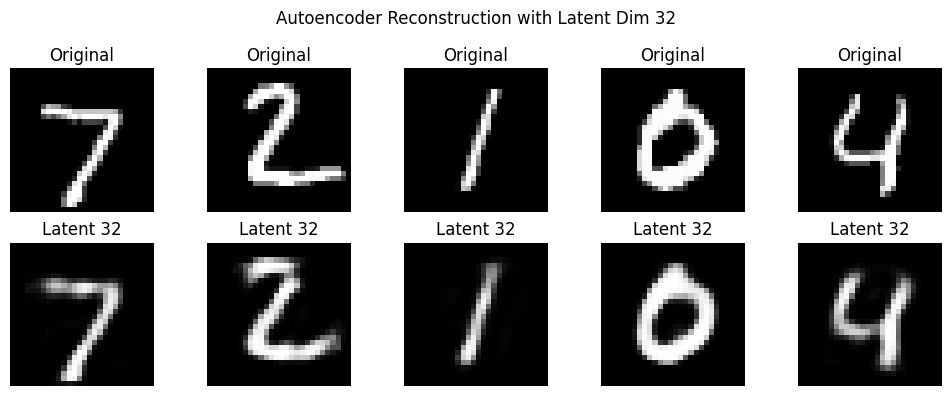


Training autoencoder with latent dimension = 64
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


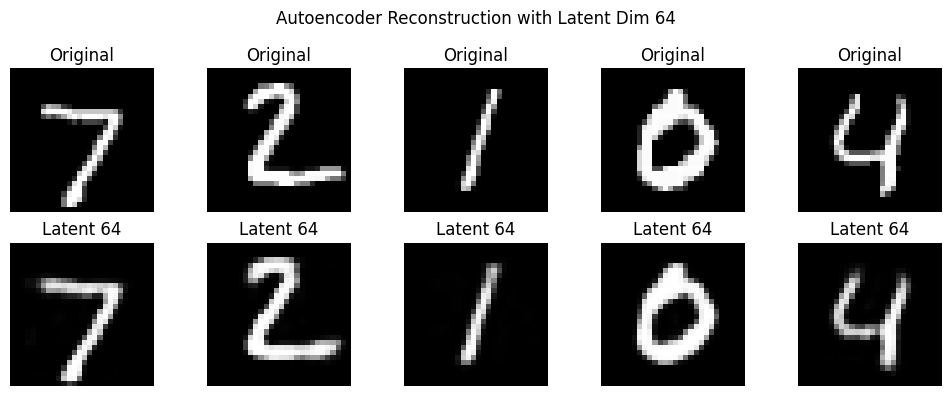

In [6]:
latent_dims = [16, 32, 64]
for dim in latent_dims:
    print(f"\nTraining autoencoder with latent dimension = {dim}")
    autoencoder = build_autoencoder(dim)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(x_train, x_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)
    decoded_imgs = autoencoder.predict(x_test)

    n = 5  # number of images to display
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        plt.title(f"Latent {dim}")
        plt.axis('off')
    plt.suptitle(f"Autoencoder Reconstruction with Latent Dim {dim}")
    plt.tight_layout()
    plt.show()